## Import Libraries


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
healthcare_df = pd.read_excel('/content/drive/MyDrive/inter_dg/Healthcare_dataset.xlsx', sheet_name='Dataset')
healthcare_df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
# data columns
healthcare_df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [ ]:
# data info & dtype 
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [ ]:
# data size
healthcare_df.size

236256

## Data Cleaning 

In [ ]:
# check missing value
healthcare_df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [ ]:
healthcare_df[healthcare_df.isnull().any(axis=1)]

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks


In [ ]:
healthcare_df.duplicated().sum()

0

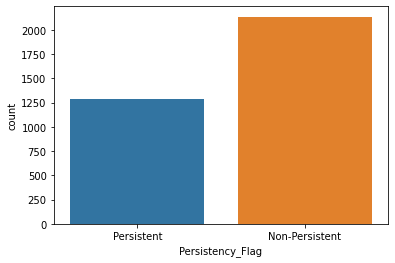

In [5]:
#Extracting the Target Attribute for Each Class and Visualize
sns.countplot('Persistency_Flag',data=healthcare_df)

In [6]:
persistent = healthcare_df[healthcare_df['Persistency_Flag'] == 'Persistent'].shape[0]
non_persistent = healthcare_df[healthcare_df['Persistency_Flag'] == 'Non-Persistent'].shape[0]
print('persistent =', persistent)
print('non_persistent =', non_persistent)

persistent = 1289
non_persistent = 2135


The dataset is imbalanced 

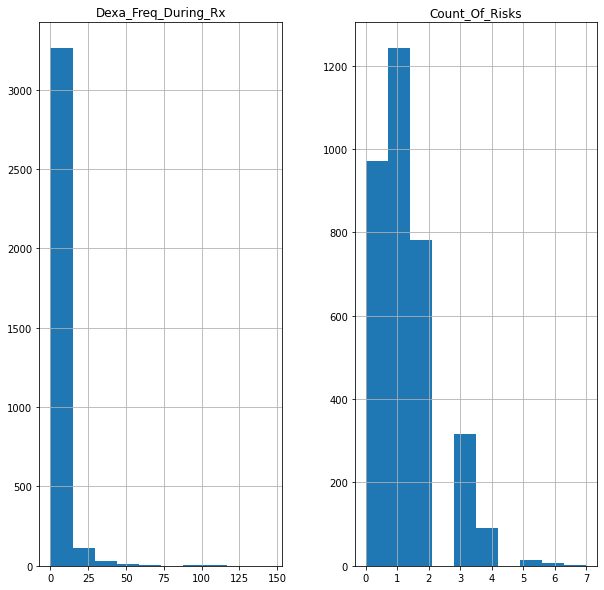

In [7]:
healthcare_df.hist(bins=10,figsize=(10,10))
plt.show()

In [35]:
#Encode the string categorical value
#LABEL ENCODING
# import packages
from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()
df = healthcare_df.drop(['Count_Of_Risks', 'Dexa_Freq_During_Rx', 'Ptid'], axis =1)
for index, row in df.iteritems():
  df[index] = le.fit_transform(df[index])
  
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
0,1,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,5,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,0


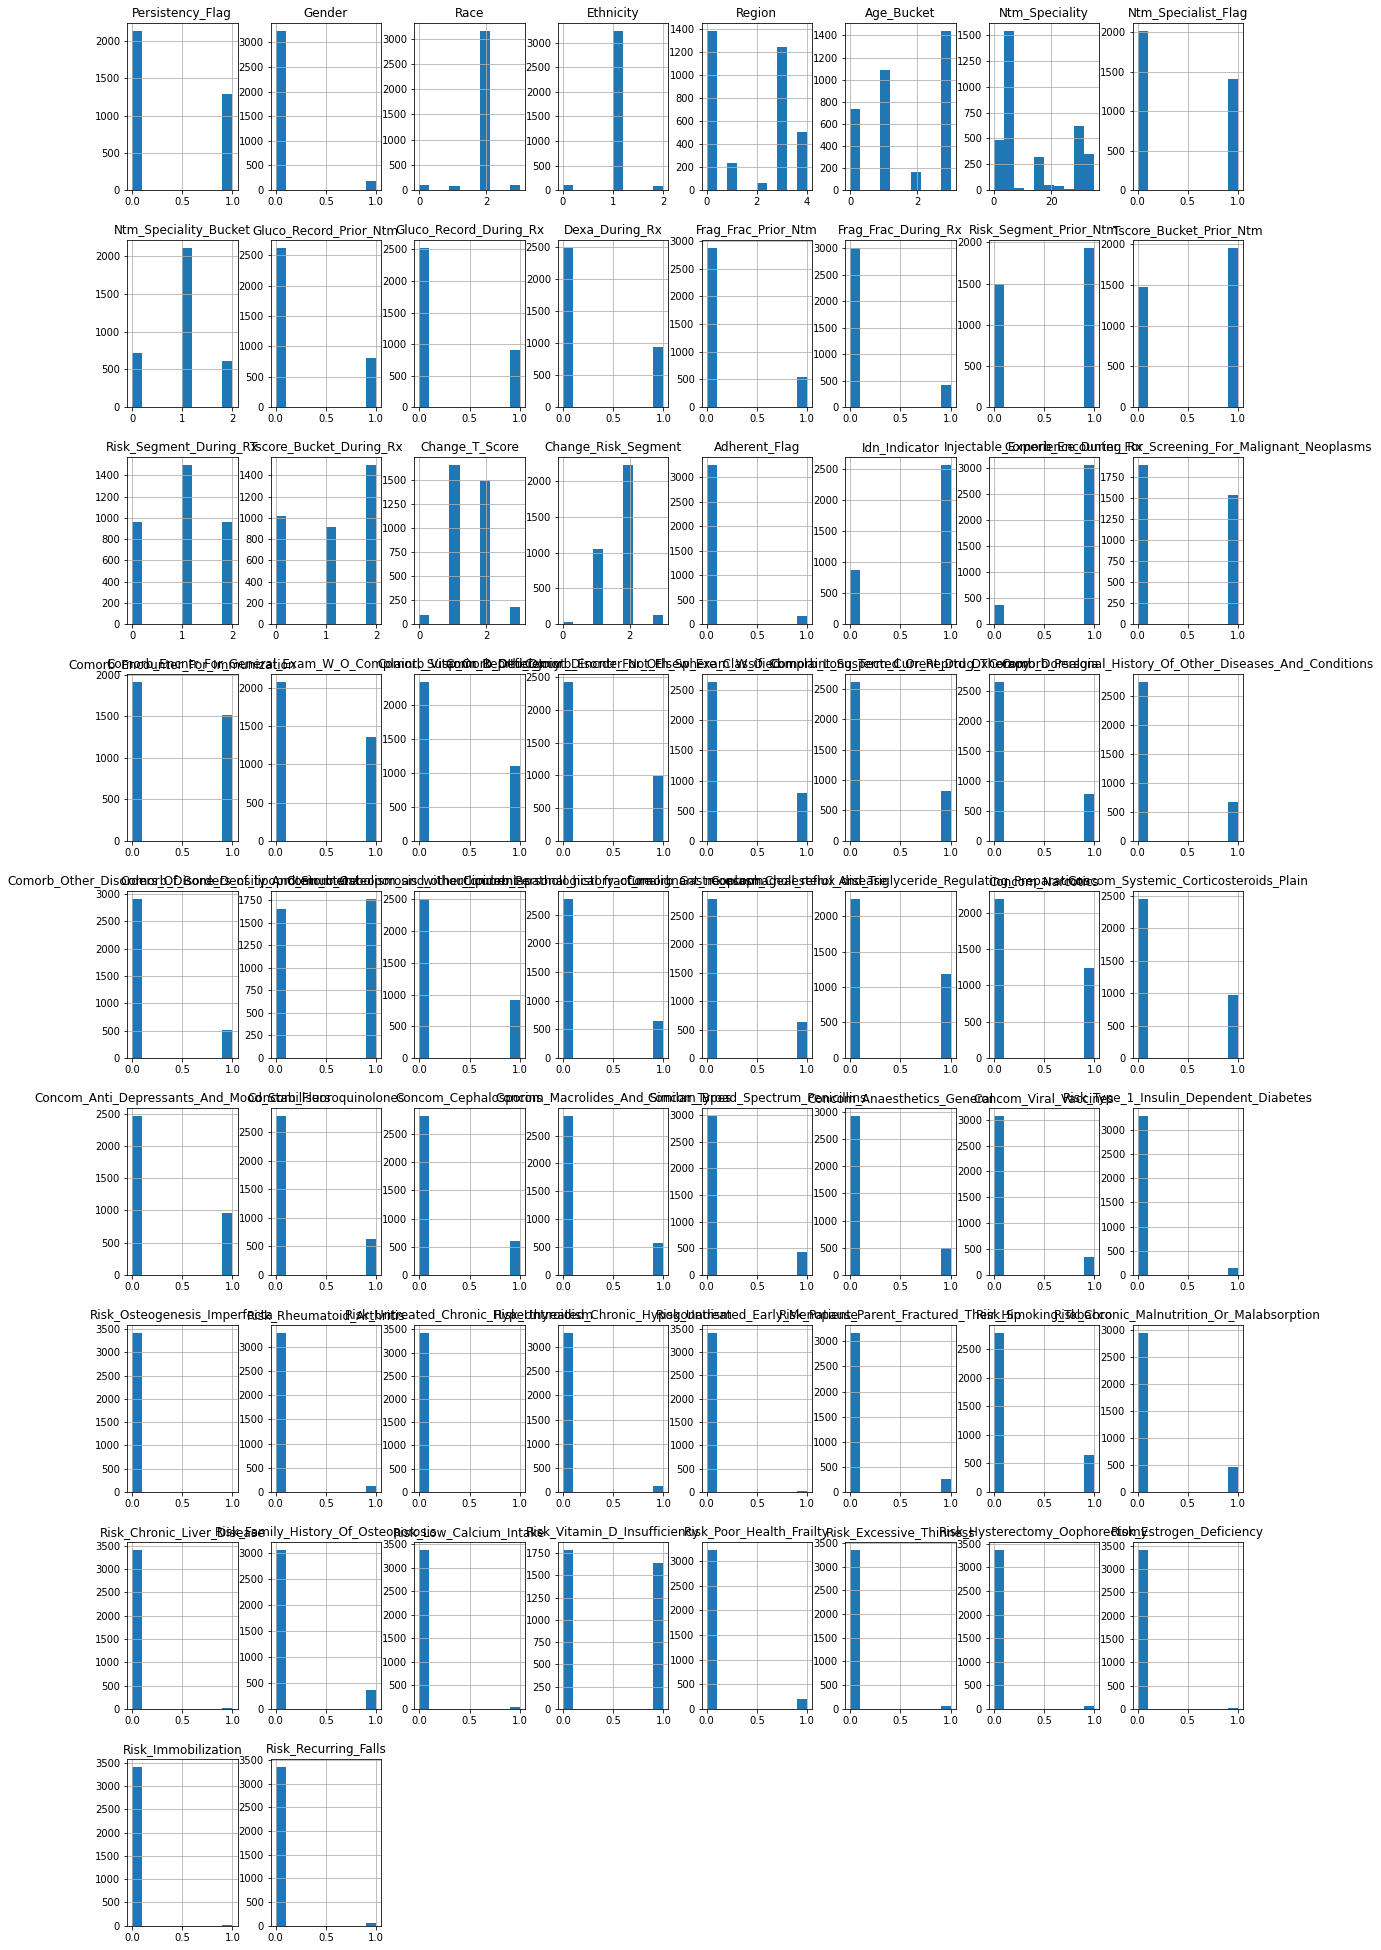

In [ ]:
df.hist(bins=10,figsize=(20,35))
plt.show()

In [36]:
df1 = healthcare_df[['Count_Of_Risks', 'Dexa_Freq_During_Rx']]
df = pd.concat([df, df1], axis = 1)
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Dexa_Freq_During_Rx
0,1,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,5,0,1,0,...,1,0,0,0,0,0,0,0,2,0
3,0,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,1,0


TypeError: ignored

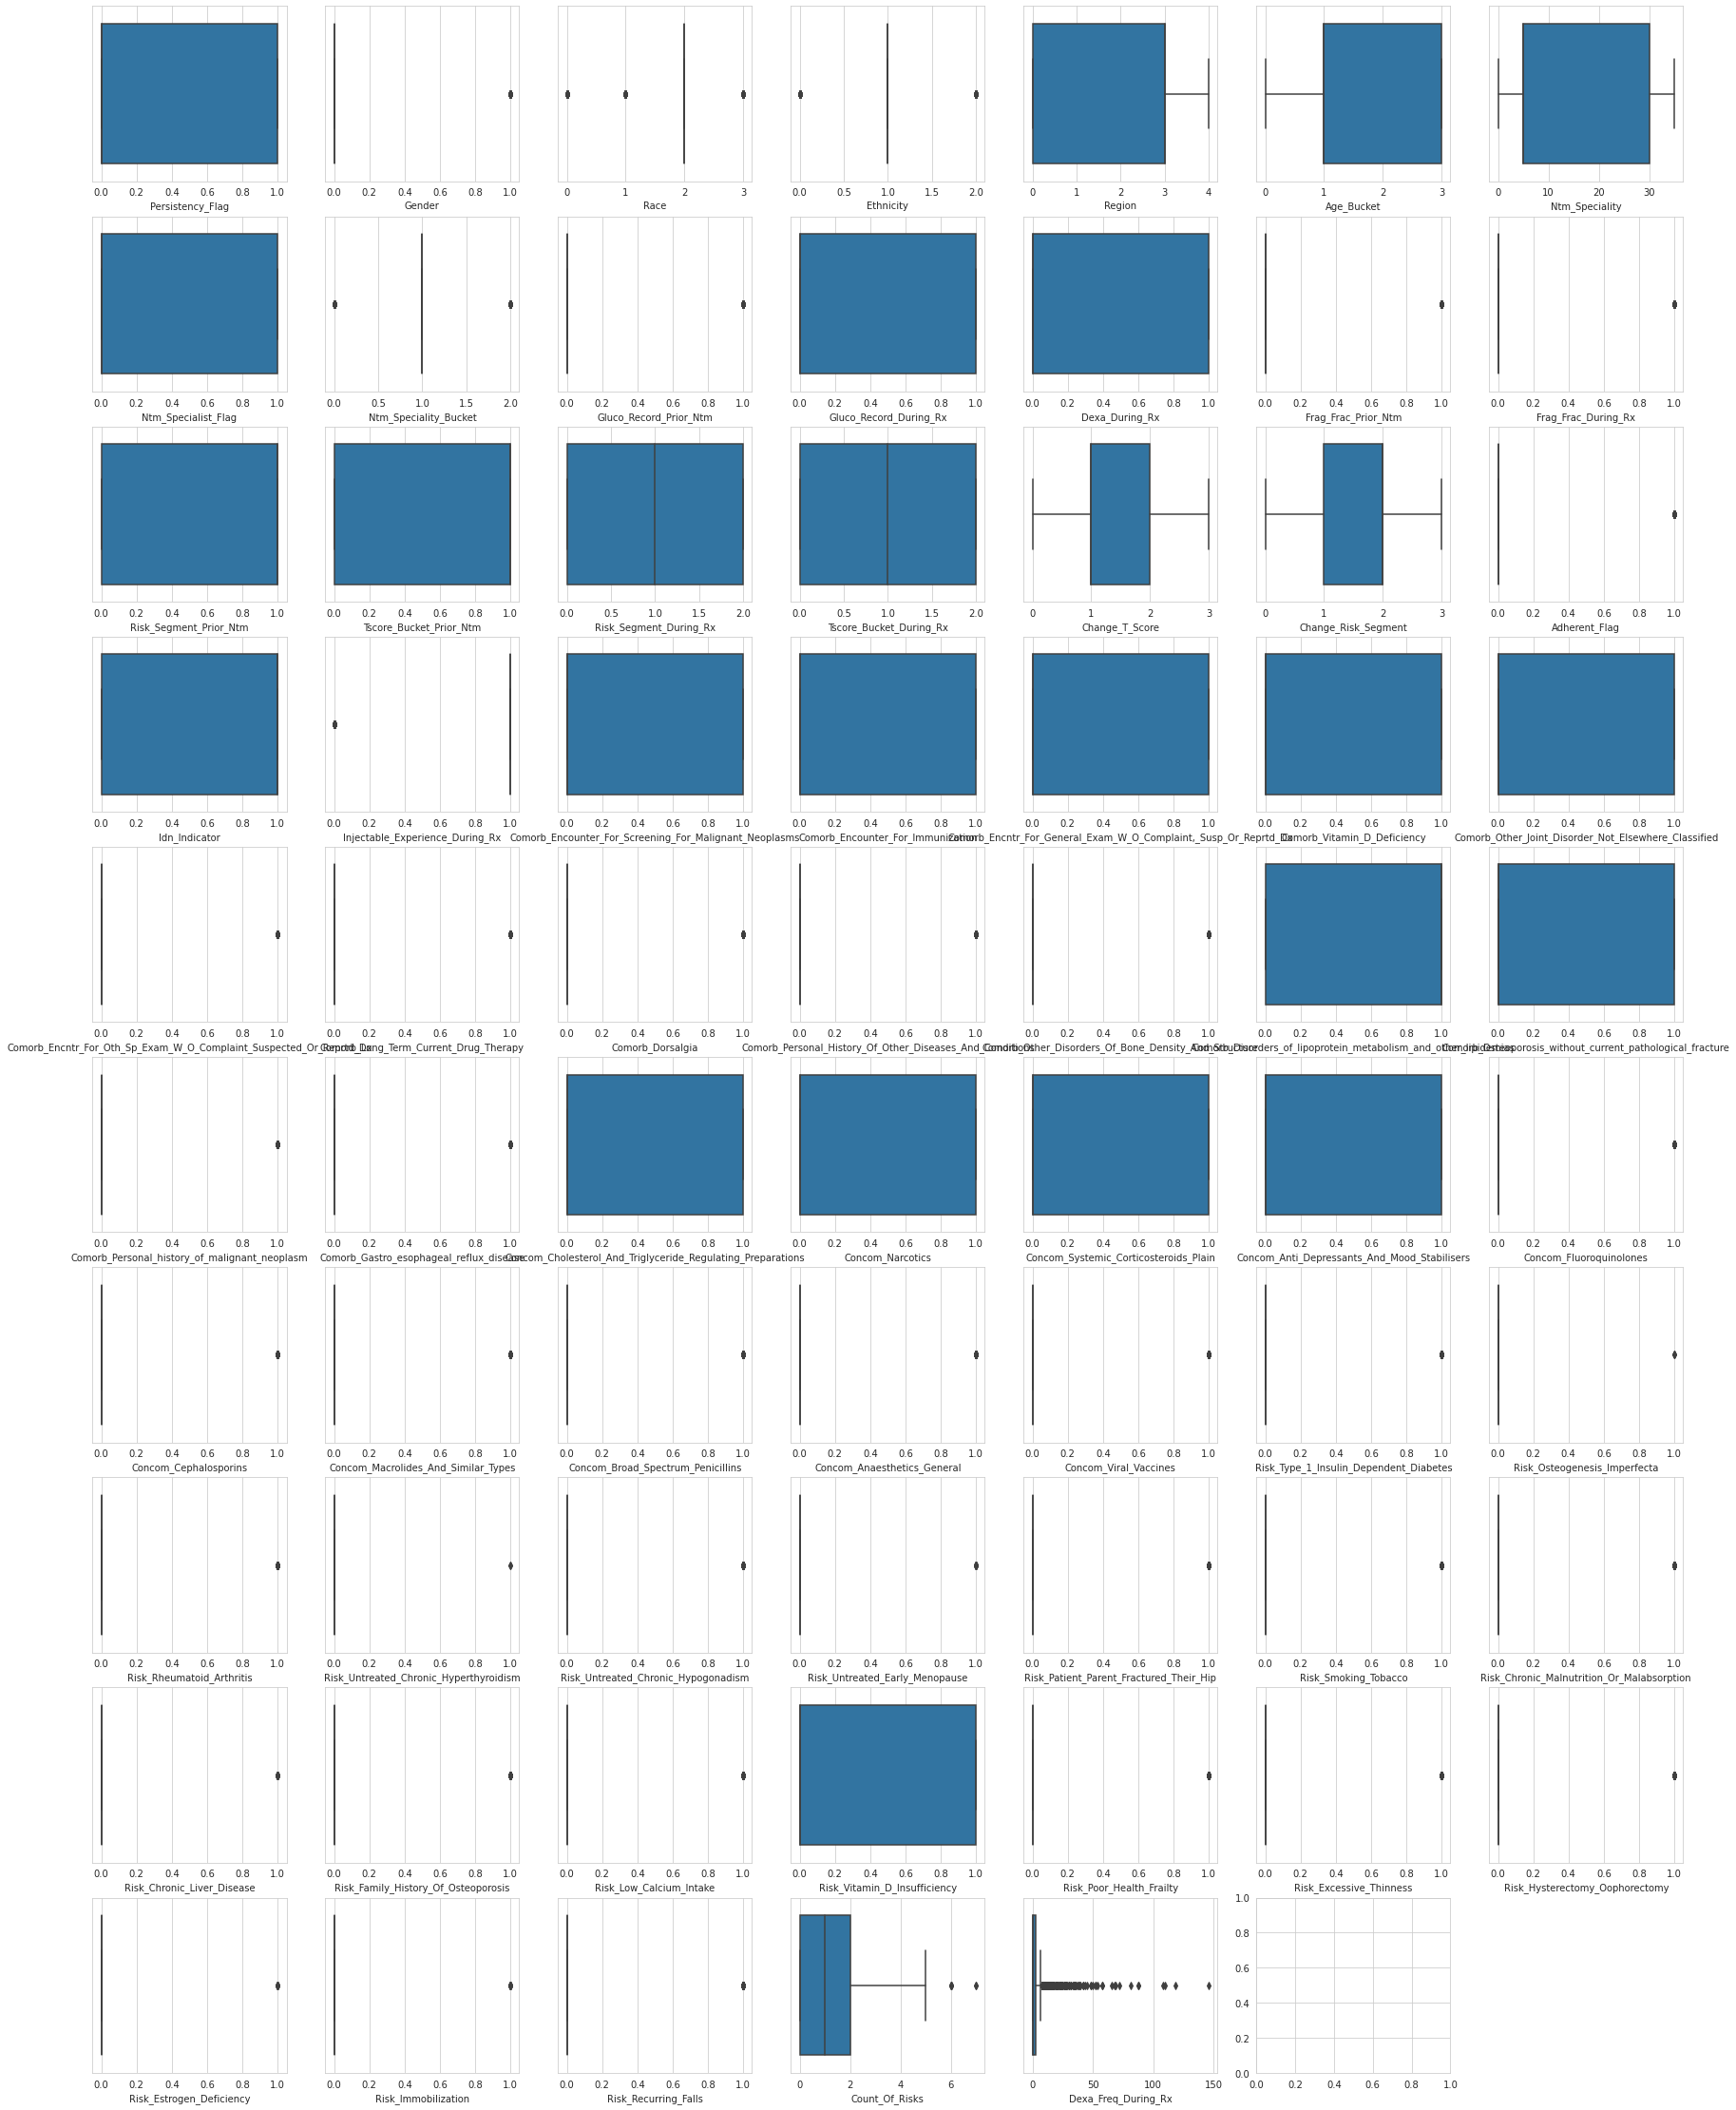

In [ ]:
plt.figure(figsize=(30,40))
sns.set_style(style='whitegrid')
count=1
for i in df.columns:
  plt.subplot(10,7,count)
  sns.boxplot(x=df[i],data=df)
  count+=1

### Handle Outliers

In [37]:
# using Quantile Transformer to handle outliers
from sklearn.preprocessing import QuantileTransformer
x= df[['Dexa_Freq_During_Rx','Count_Of_Risks']]
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new = quantile.transform(X)
df_new = pd.DataFrame(X)
df_new.columns = ['Dexa_Freq_During_Rx','Count_Of_Risks']
df_new.head()

,Dexa_Freq_During_Rx,Count_Of_Risks
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.760260
3,0.0,0.464965
4,0.0,0.464965


In [38]:
df_new.columns = ['Dexa_Freq_During_Rx','Count_Of_Risks']
df_new.head()

,Dexa_Freq_During_Rx,Count_Of_Risks
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.760260
3,0.0,0.464965
4,0.0,0.464965


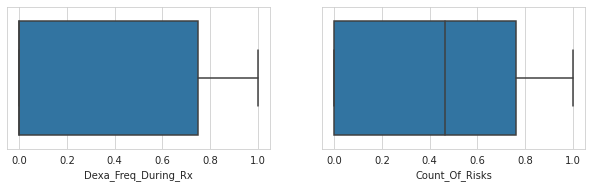

In [15]:
# result 
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
count=1
for i in df_new.columns:
  plt.subplot(4,3,count)
  sns.boxplot(x=df_new[i],data=df_new)
  count+=1

In [39]:
df = df.drop(['Count_Of_Risks', 'Dexa_Freq_During_Rx'], axis =1)

In [40]:
df = pd.concat([df, df_new], axis = 1)
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Dexa_Freq_During_Rx,Count_Of_Risks
0,1,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0.000000
1,0,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0.000000
2,0,0,3,0,0,1,5,0,1,0,...,1,0,0,0,0,0,0,0,0.0,0.760260
3,0,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0.464965
4,0,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0.0,0.464965


# Split the Data Frame

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
target_name='Persistency_Flag'
y= df[target_name]#given predictions - training data 
X=df.drop(target_name,axis=1)#dropping the No-show column and keeping all other columns as X

In [43]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 70% train, 30%test
# training set size
X_train.shape,y_train.shape

((2739, 67), (2739,))

In [44]:
#Test set size
X_test.shape,y_test.shape

((685, 67), (685,))

# Model Building

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

In [46]:
# Create the parameter grid based on the results of random search
max_depth=[]
min_samples_leaf=[]

for i in range(1,10):
  max_depth.append(i)

for j in range(1,25):
  min_samples_leaf.append(j)

params = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ["gini", "entropy"]
}

In [48]:
grid_search_dt = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [49]:
grid_search_dt.fit(X_train, y_train)
best_model_dt = grid_search_dt.best_estimator_
best_model_dt

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, random_state=42)